In [1]:

import pandas as pd
from bs4 import BeautifulSoup
import re


In [2]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [3]:
## To install the sentiment analysis and word tokenizer we will use for this tutorial, 
#write a new Python script with the following three lines

import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ankita
[nltk_data]     Padwal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ankita
[nltk_data]     Padwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [6]:
data = pd.read_csv('C:/Users/Ankita Padwal/Desktop/Data Mining Projetc/FinalData/TweetSentiment.csv'
                   ,index_col=0)

In [8]:
pd.options.display.max_colwidth = 150
data.head()

,Tweet_ID,User_Name,Brand Name,TweetText,TweetCleaned,com scores,pos scores,neu scores,neg scores,sentiment
0,9.880000e+17,hauspa,ASOS,b'@changeist and @madelineashby talked about the future of fashion retail for ASOS Assembles https://t.co/B8Wy1tX3Bj',b and talked about the future of fashion retail for asos assembles,0.0000,0.000,1.000,0.0,Neutral
1,9.880000e+17,_shekss,ASOS,b'RT @TEEWEAR: This is my work and I really care about representation in fashion and social consciousness.\n\nVOTE FOR THIS TO WIN ON @ASOS so\xe2...,b rt this is my work and i really care about representation in fashion and social consciousness n nvote for this to win on so xe x xa,0.8070,0.249,0.751,0.0,Positive
2,9.880000e+17,olu_neyo,ASOS,b'@ASOS_HeretoHelp Please check your DM. I have an urgent and important message fo you. Thnks!',b heretohelp please check your dm i have an urgent and important message fo you thnks,0.5994,0.349,0.651,0.0,Positive
3,9.880000e+17,amyandelizabeth,ASOS,b'Me: I just want a nice pair of jeans that pull up over my thighs and butt without gapping at the waist \nASOS: https://t.co/N3UBrQRlfe',b me i just want a nice pair of jeans that pull up over my thighs and butt without gapping at the waist nasos,0.4767,0.177,0.823,0.0,Neutral
4,9.880000e+17,Joseluisalgar,ASOS,"b'Vale asos y kiabi tienen tallas grandes, pero donde compro camisetas que me valgan con dise\xc3\xb1os de grupos, pel\xc3\xadculas\xe2\x80\xa6 ht...",b vale asos y kiabi tienen tallas grandes pero donde compro camisetas que me valgan con dise xc xb os de grupos pel xc xadculas xe x xa,0.0000,0.000,1.000,0.0,Neutral


In [11]:
neudata=data[data['sentiment']=='Neutral']
neudata.head()

,Tweet_ID,User_Name,Brand Name,TweetText,TweetCleaned,com scores,pos scores,neu scores,neg scores,sentiment
0,9.880000e+17,hauspa,ASOS,b'@changeist and @madelineashby talked about the future of fashion retail for ASOS Assembles https://t.co/B8Wy1tX3Bj',b and talked about the future of fashion retail for asos assembles,0.0000,0.000,1.000,0.0,Neutral
3,9.880000e+17,amyandelizabeth,ASOS,b'Me: I just want a nice pair of jeans that pull up over my thighs and butt without gapping at the waist \nASOS: https://t.co/N3UBrQRlfe',b me i just want a nice pair of jeans that pull up over my thighs and butt without gapping at the waist nasos,0.4767,0.177,0.823,0.0,Neutral
4,9.880000e+17,Joseluisalgar,ASOS,"b'Vale asos y kiabi tienen tallas grandes, pero donde compro camisetas que me valgan con dise\xc3\xb1os de grupos, pel\xc3\xadculas\xe2\x80\xa6 ht...",b vale asos y kiabi tienen tallas grandes pero donde compro camisetas que me valgan con dise xc xb os de grupos pel xc xadculas xe x xa,0.0000,0.000,1.000,0.0,Neutral
7,9.880000e+17,Veille2Laurent,ASOS,b'RT @AurelienClaudez: Les marques et les bots : \n- Sephora a augment\xc3\xa9 ses rdv relooking de 11% \n- ASOS a augment\xc3\xa9 ses commandes d...,b rt les marques et les bots n sephora a augment xc xa ses rdv relooking de n asos a augment xc xa ses commandes de n k xe x xa,0.0000,0.000,1.000,0.0,Neutral
8,9.880000e+17,FleurDeForce,ASOS,b'My HUSBAND Does My ASOS HAUL: https://t.co/mqgSWR641q https://t.co/8Xh2Cn6lwx',b my husband does my asos haul,0.0000,0.000,1.000,0.0,Neutral


In [12]:
posdata=data[data['sentiment']=='Positive']
posdata.head()

,Tweet_ID,User_Name,Brand Name,TweetText,TweetCleaned,com scores,pos scores,neu scores,neg scores,sentiment
1,9.880000e+17,_shekss,ASOS,b'RT @TEEWEAR: This is my work and I really care about representation in fashion and social consciousness.\n\nVOTE FOR THIS TO WIN ON @ASOS so\xe2...,b rt this is my work and i really care about representation in fashion and social consciousness n nvote for this to win on so xe x xa,0.8070,0.249,0.751,0.0,Positive
2,9.880000e+17,olu_neyo,ASOS,b'@ASOS_HeretoHelp Please check your DM. I have an urgent and important message fo you. Thnks!',b heretohelp please check your dm i have an urgent and important message fo you thnks,0.5994,0.349,0.651,0.0,Positive
5,9.880000e+17,demicolleen,ASOS,b'RT @TEEWEAR: This is my work and I really care about representation in fashion and social consciousness.\n\nVOTE FOR THIS TO WIN ON @ASOS so\xe2...,b rt this is my work and i really care about representation in fashion and social consciousness n nvote for this to win on so xe x xa,0.8070,0.249,0.751,0.0,Positive
6,9.880000e+17,olu_neyo,ASOS,b'@ASOS_HeretoHelp Please check your DM. I have an urgent and important message fo you. Thanks!',b heretohelp please check your dm i have an urgent and important message fo you thanks,0.7783,0.468,0.532,0.0,Positive
11,9.880000e+17,traceyannereid,ASOS,"b""@kylsm5 @CFCCheersquad @LCBlues95 @yannos01 @thepumper5 @AndyMaherDFA Gees .... another 2 to 3. Well let's hope ASOS is back soon.""",b gees another to well let s hope asos is back soon,0.6124,0.385,0.615,0.0,Positive


In [13]:
negdata=data[data['sentiment']=='Negative']
negdata.head()

,Tweet_ID,User_Name,Brand Name,TweetText,TweetCleaned,com scores,pos scores,neu scores,neg scores,sentiment
10,9.880000e+17,Conja25,ASOS,b'@ASOS absolutely ridiculous service. Trying to use 20% off birthday code and card declines. Wanting spend a lot of\xe2\x80\xa6 https://t.co/sPka...,b absolutely ridiculous service trying to use off birthday code and card declines wanting spend a lot of xe x xa,-0.4201,0.000,0.859,0.141,Negative
19,9.880000e+17,BlogBeth,ASOS,b'It\xe2\x80\x99s triple points day at ASOS and I\xe2\x80\x99m doing so well b my clothes spending ban \xf0\x9f\x98\xad Must not give in...',b it xe x x s triple points day at asos and i xe x x m doing so well b my clothes spending ban xf x f x xad must not give in,-0.2165,0.104,0.759,0.137,Negative
50,9.880000e+17,EmilyPaterno,ASOS,b'@ASOS_HeretoHelp really disappointed not to receive any offer or code for my birthday! Especially when this is writ\xe2\x80\xa6 https://t.co/HcM...,b heretohelp really disappointed not to receive any offer or code for my birthday especially when this is writ xe x xa,-0.5256,0.000,0.848,0.152,Negative
51,9.880000e+17,ASOS_HeretoHelp,ASOS,"b""@georgiegeorgee Hi George - We're sorry to hear that you returns email isn't showing the correct card. Drop us a DM\xe2\x80\xa6 https://t.co/2eB...",b hi george we re sorry to hear that you returns email isn t showing the correct card drop us a dm xe x xa,-0.3400,0.000,0.848,0.152,Negative
66,9.880000e+17,beckymariaflt,ASOS,b'I\xe2\x80\x99m considering it a Personal Attack that today is a triple points day on asos for me + it\xe2\x80\x99s the end of the month s\xe2\x8...,b i xe x x m considering it a personal attack that today is a triple points day on asos for me it xe x x s the end of the month s xe x xa,-0.4767,0.000,0.881,0.119,Negative


In [14]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#Installing libraries to build wordcloud

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [27]:
#Create wordcloud using world cloud object 

msg= negdata['TweetCleaned']
#msg
nwords=''
for t in negdata['TweetCleaned']:
    nwords= nwords+t

pwords=''
for t in posdata['TweetCleaned']:
    pwords= pwords+t

uwords=''
for t in neudata['TweetCleaned']:
    uwords= uwords+t


(-0.5, 399.5, 199.5, -0.5)

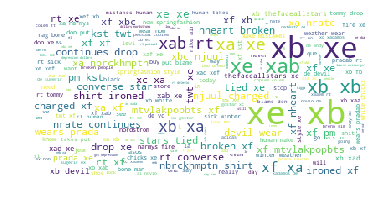

In [54]:
#Create wordcloud using world cloud object

wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS,background_color='white').generate(nwords)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

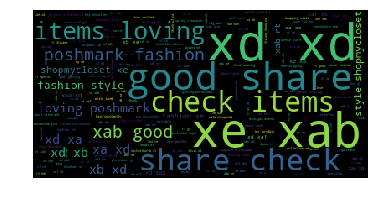

In [51]:
#Create wordcloud using world cloud object

wordcloud = WordCloud(max_font_size=60,stopwords=STOPWORDS,background_color='black').generate(pwords)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

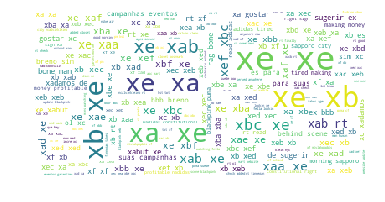

In [55]:
#Create wordcloud using world cloud object

wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS,background_color='white').generate(uwords)
plt.imshow(wordcloud)
plt.axis("off")